# Customer Data Visualization with Matplotlib
#### This notebook demonstrates various visualizations of customer purchase data using Matplotlib.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import base64
import numpy as np
import os

#### Data Loading

##### Loading data from shopping_trends.csv in the data folder.

In [2]:
df = pd.read_csv('shopping_trends.csv')

In [3]:
def save_plot_to_base64(plt, title):
    """Helper function to save plot as base64 encoded image"""
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.read()).decode('utf-8')
    return {
        'title': title,
        'image': f'data:image/png;base64,{image_base64}'
    }

#### Cleaning and organinzing the code 

In [4]:
 # Clean data before visualization
df_clean = df.copy()

# Fill missing numeric values with their respective means
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# Fill missing categorical values with their most frequent value
categorical_cols = ['Category', 'Payment Method', 'Gender', 'Season', 'Subscription Status']
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Drop any remaining rows with missing values in critical columns
critical_cols = ['Age', 'Category', 'Purchase Amount (USD)', 'Payment Method', 'Review Rating']
df_clean = df_clean.dropna(subset=[col for col in critical_cols if col in df_clean.columns])

visualizations = []    

   #### Visualization 1: Age Distribution

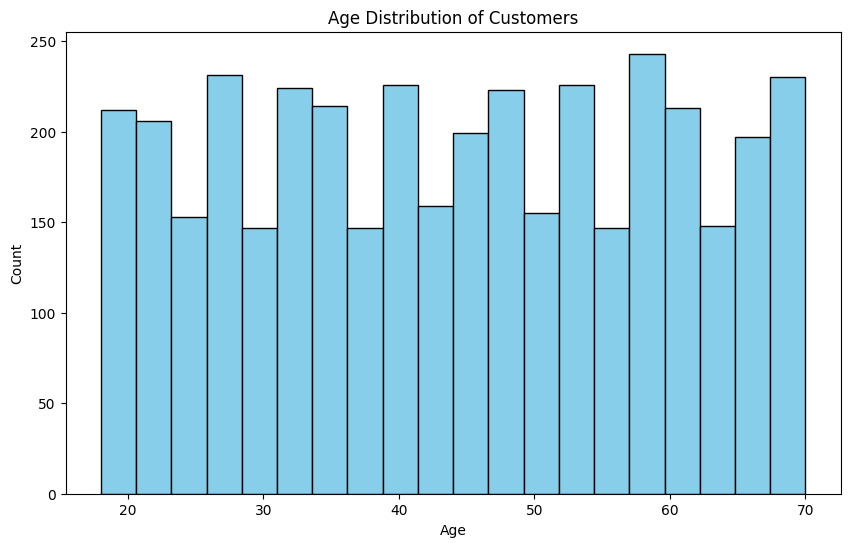

In [5]:
    plt.figure(figsize=(10, 6))
    plt.hist(df_clean['Age'].values, bins=20, edgecolor='black', color='skyblue')
    plt.title('Age Distribution of Customers')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
    plt.close()
    

 #### Visualization 2: Purchase Amount by Category

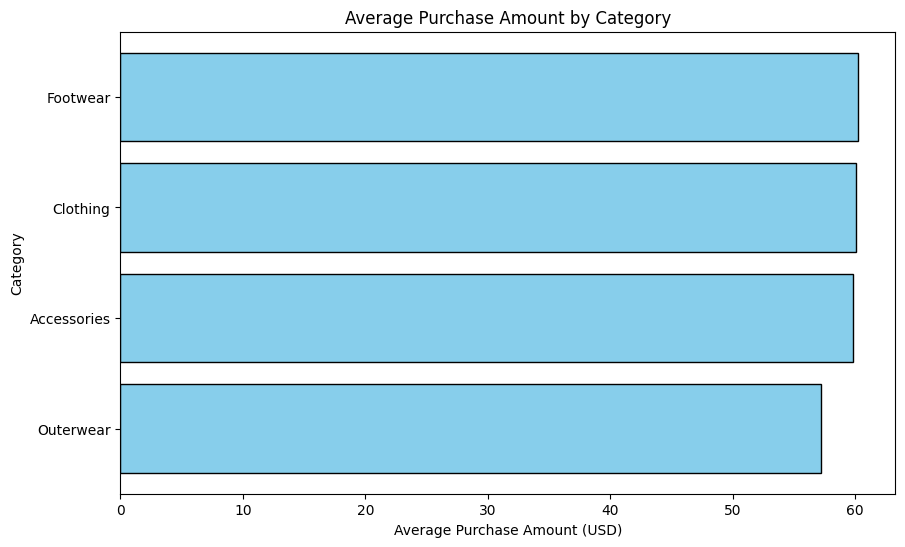

In [6]:
plt.figure(figsize=(10, 6))
category_means = df_clean.groupby('Category')['Purchase Amount (USD)'].mean().sort_values()
categories = category_means.index
means = category_means.values 
plt.barh(categories, means, color='skyblue', edgecolor='black')
plt.title('Average Purchase Amount by Category')
plt.xlabel('Average Purchase Amount (USD)')
plt.ylabel('Category')
plt.show()
plt.close()

#### Visualization 3: Payment Method Distribution

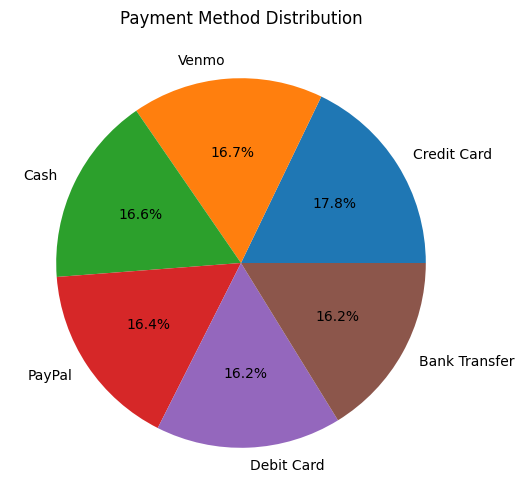

In [7]:
plt.figure(figsize=(8, 6))
payment_counts = df_clean['Payment Method'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.show()
plt.close()

#### Visualization 4: Purchase Amount vs. Review Rating

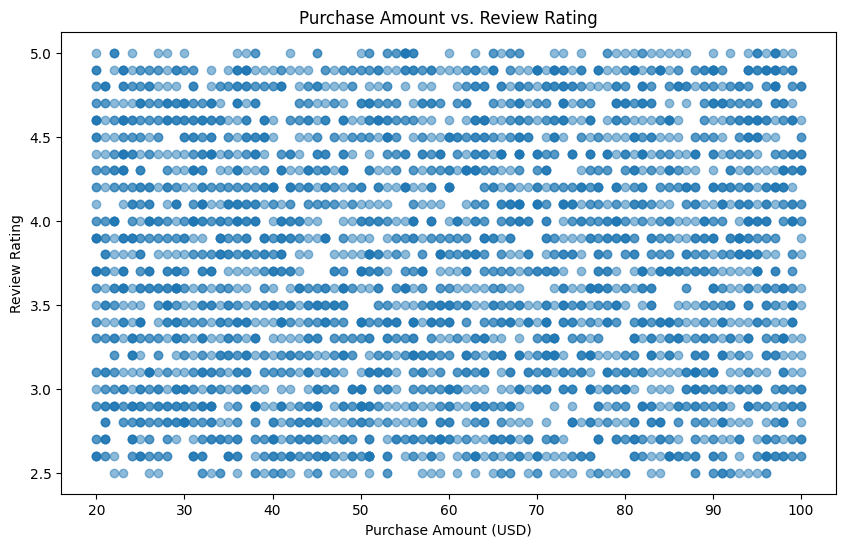

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Purchase Amount (USD)'], df_clean['Review Rating'], alpha=0.5)
plt.title('Purchase Amount vs. Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()
plt.close()

#### Visualization 5: Gender Distribution

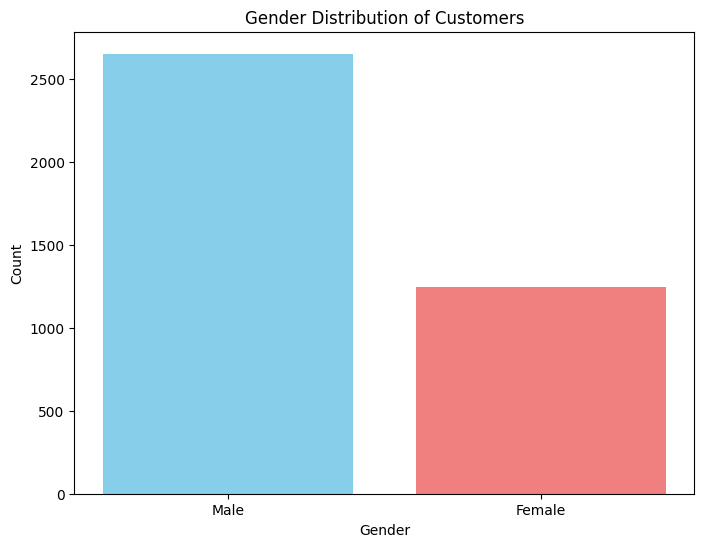

In [9]:
plt.figure(figsize=(8, 6))
gender_counts = df_clean['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
plt.close()

##### Visualization 6: Seasonal Purchase Trends

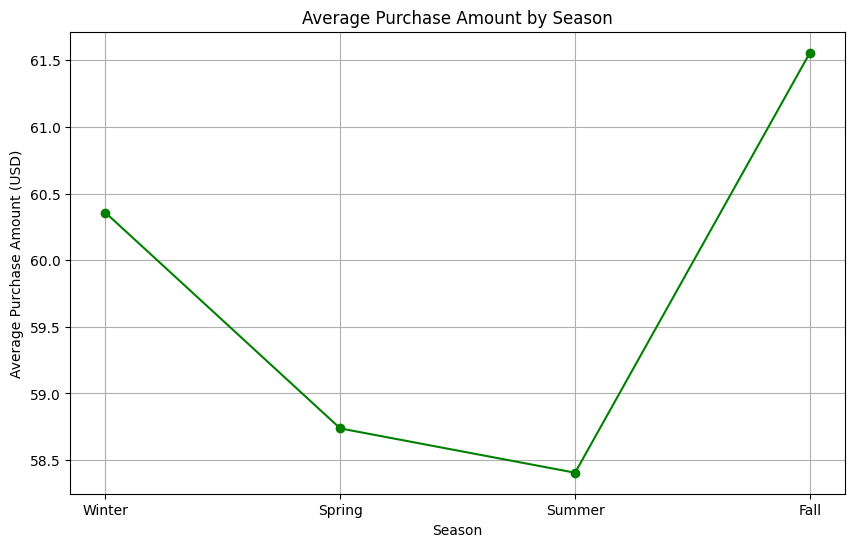

In [10]:
plt.figure(figsize=(10, 6))
season_means = df_clean.groupby('Season')['Purchase Amount (USD)'].mean()
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
season_means = season_means.reindex(seasons, fill_value=0)  
plt.plot(season_means.index, season_means.values, marker='o', color='green')
plt.title('Average Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(True)
plt.show()
plt.close()

#### Visualization 7: Previous Purchases vs Age

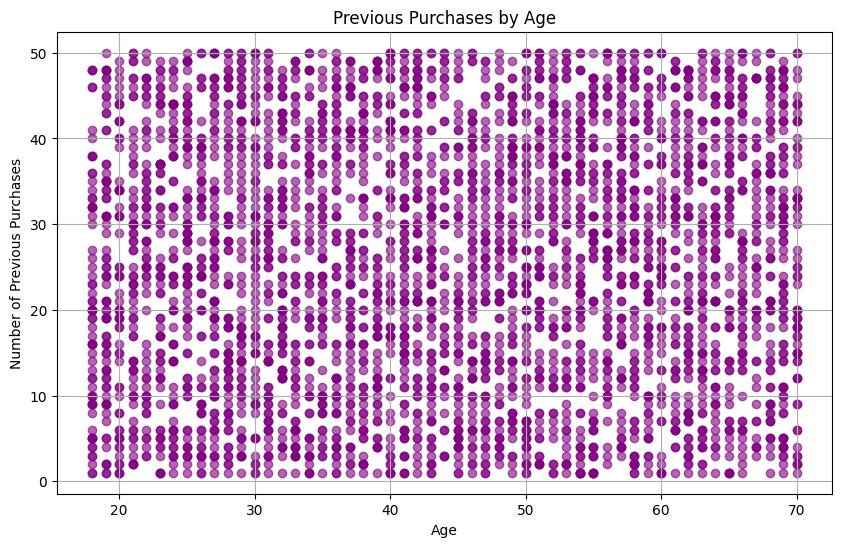

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age'], df_clean['Previous Purchases'], alpha=0.6, color='purple')
plt.title('Previous Purchases by Age')
plt.xlabel('Age')
plt.ylabel('Number of Previous Purchases')
plt.grid(True)
plt.show()
plt.close()

#### Visualization 8: Subscription Status Impact on Purchase Amount

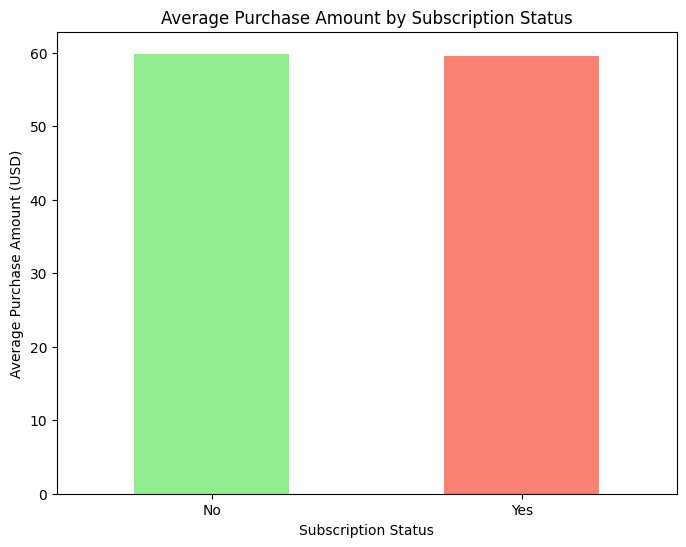

In [12]:
plt.figure(figsize=(8, 6))
subscription_means = df_clean.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
subscription_means.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Average Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.show()
plt.close()

 #### Visualization 9: Frequency of Purchases Distribution

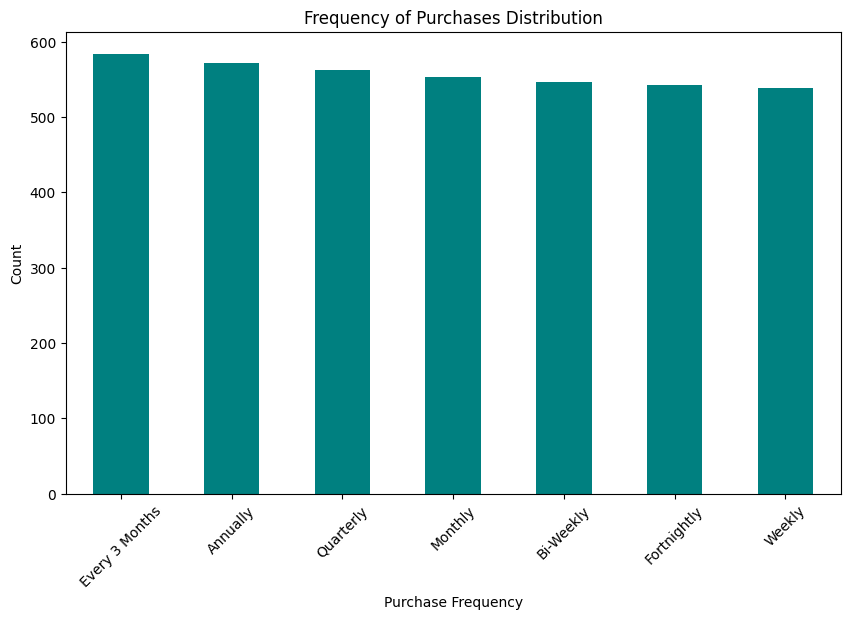

In [13]:
plt.figure(figsize=(10, 6))
freq_counts = df_clean['Frequency of Purchases'].value_counts()
freq_counts.plot(kind='bar', color='teal')
plt.title('Frequency of Purchases Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.close()